In [1]:
import pandas as pd
import numpy as np
import os, os.path as op
import pingouin as pg

In [2]:
data_1 = pd.read_csv(op.join('data', 'listings_1.csv'), sep =',')
data_2 = pd.read_csv(op.join('data', 'listings_2.csv'), sep =',')
data_3 = pd.read_csv(op.join('data', 'listings_3.csv'), sep =',')
data_4 = pd.read_csv(op.join('data', 'listings_4.csv'), sep =',')
data_5 = pd.read_csv(op.join('data', 'listings_5.csv'), sep =',')

In [3]:
data_1.shape

(3900, 10)

In [4]:
data = data_1.append([data_2,data_3,data_4,data_5])

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
data.head()

,Address,Price,Space,Rooms,Market,Year,Evelevator,Balcony,Level,Parking place
0,"Warszawa, Białołęka, Żerań, ul. Starowiślna",565000.0,41.34,2,wtórny,2019,tak,"ogródek, taras",parter/6,garaż/miejsce parkingowe
1,"Warszawa, Ursynów, Wyczółki",575000.0,43.52,2,wtórny,2021,tak,balkon,4/4,NaN
2,"Warszawa, Śródmieście, Śródmieście Północne, u...",744000.0,37.4,2,wtórny,2011,tak,balkon,2/6,garaż/miejsce parkingowe
3,"Warszawa, Białołęka, ul. Leona Berensona",444845.0,56.8,3,pierwotny,2021,tak,balkon,NaN,garaż/miejsce parkingowe
4,"Warszawa, Praga-Południe, Saska Kępa, ul. Zako...",1700000.0,91.5,4,wtórny,1939,nie,"balkon, ogródek",1/3,NaN


In [6]:
data.shape

(23322, 10)

In [7]:
data.isnull().sum()

Address             0
Price            6042
Space               0
Rooms               0
Market           6275
Year             6275
Evelevator       8423
Balcony          6454
Level             424
Parking place    8165
dtype: int64

In [8]:
data.dtypes

Address           object
Price            float64
Space             object
Rooms              int64
Market            object
Year              object
Evelevator        object
Balcony           object
Level             object
Parking place     object
dtype: object

## Price

In [9]:
price = data.Price

In [10]:
price[:10]

0     565000.0
1     575000.0
2     744000.0
3     444845.0
4    1700000.0
5     655000.0
6     530000.0
7     560000.0
8     325812.0
9     660000.0
Name: Price, dtype: float64

In [11]:
round(price.isna().sum() / len(price),2)

0.26

26% rows doesn't have any price value.

In [12]:
price.describe().apply(lambda x: format(x, 'f'))

count        17280.000000
mean       2087052.577894
std       17709396.948748
min          25000.000000
25%         549000.000000
50%         690000.000000
75%         966081.000000
max      904581046.000000
Name: Price, dtype: object

In [13]:
price.dropna(inplace=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

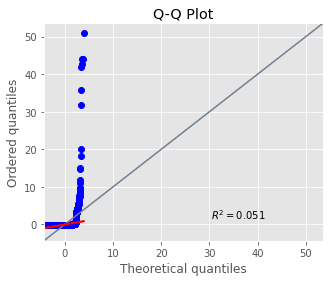

In [15]:
ax = pg.qqplot(price, dist='norm')

In [16]:
price_z = (price - price.mean()) / price.std()
print(len(price_z[price_z> 3]))
print(len(price_z[price_z< -3]))

158
0


In [17]:
suspected_values = price[price_z[price_z> 3].index]
suspected_values

590      92984270.0
590        750000.0
590        670000.0
591      67839940.0
591        540000.0
           ...     
4522     64044510.0
5580     73297912.0
5581     93602776.0
5724    105647817.0
7574    150909048.0
Name: Price, Length: 607, dtype: float64

In [18]:
suspected_values.describe().apply(lambda x: format(x, 'f'))

count          607.000000
mean      31031897.270181
std       88855777.825631
min         239000.000000
25%         580000.000000
50%         869000.000000
75%       56229650.000000
max      904581046.000000
Name: Price, dtype: object

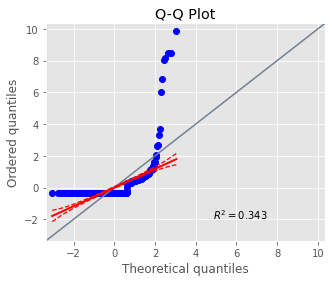

In [19]:
ax = pg.qqplot(suspected_values, dist='norm')

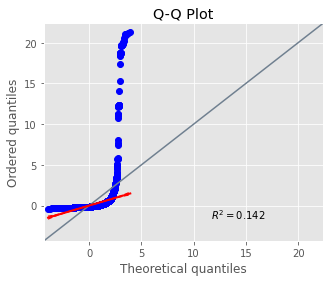

In [20]:
price_without= price.drop(price_z[price_z> 3].index)
ax = pg.qqplot(price_without, dist='norm')

In [21]:
price_without.describe().apply(lambda x: format(x, 'f'))

count       16673.000000
mean      1033281.767108
std       2538621.838970
min         25000.000000
25%        549000.000000
50%        689000.000000
75%        950000.000000
max      55091050.000000
Name: Price, dtype: object

In [22]:
price_5mil = price[price < 5000000]

In [23]:
price_5mil.max()

4950000.0

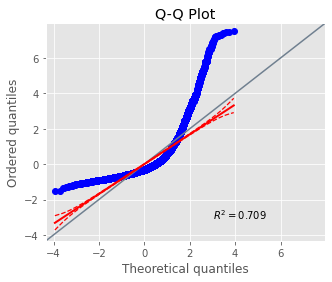

In [24]:
from sklearn import preprocessing
price_normalized = preprocessing.normalize([price_5mil])
ax = pg.qqplot(price_normalized, dist='norm')

In [33]:
price_normalized.shape

(1, 16941)

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

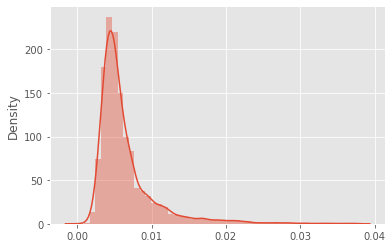

In [25]:
sns.distplot(price_normalized)

## Space

In [26]:
space = data.Space
space[:10]

0    41.34
1    43.52
2     37.4
3     56.8
4     91.5
5     57.0
6    51.53
7    55.28
8     37.6
9     69.5
Name: Space, dtype: object

In [32]:
space.shape

(23322,)

In [27]:
data.Space = data.Space.str.replace('/','')
data.Space = data.Space.astype('float')
space = data.Space

In [79]:
round(space.isna().sum() / len(space),2)

0.67

<AxesSubplot:>

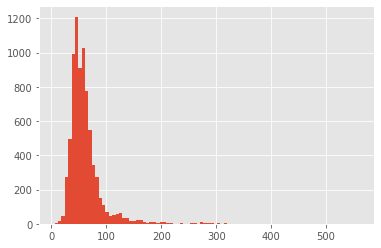

In [28]:
space.hist(bins = 90)

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Space', ylabel='Density'>

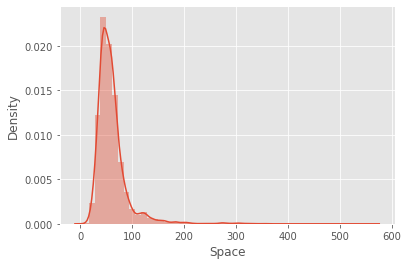

In [29]:
sns.distplot(space)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

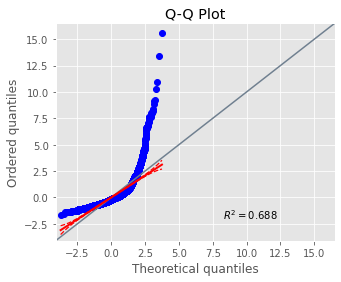

In [43]:
pg.qqplot(space)

In [45]:
space.describe()

count    7722.000000
mean       60.762648
std        31.911618
min         6.000000
25%        43.520000
50%        54.815000
75%        68.000000
max       560.000000
Name: Space, dtype: float64

## Rooms

In [66]:
rooms = data.Rooms

In [67]:
rooms[:10]

0    2
1    2
2    2
3    3
4    4
5    3
6    3
7    3
8    2
9    3
Name: Rooms, dtype: int64

In [68]:
rooms.describe()

count    23322.000000
mean         2.631721
std          0.976414
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

In [69]:
rooms = rooms.astype('str')

In [80]:
round(rooms.isna().sum() / len(rooms),2)

0.0

In [70]:
rooms.describe()

count     23322
unique       10
top           2
freq       8913
Name: Rooms, dtype: object

<AxesSubplot:>

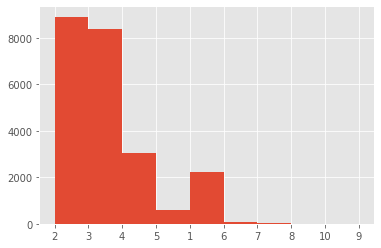

In [78]:
rooms.hist(bins =9)

## Market

In [81]:
market = data.Market

In [82]:
market[:10]

0       wtórny
1       wtórny
2       wtórny
3    pierwotny
4       wtórny
5       wtórny
6       wtórny
7       wtórny
8    pierwotny
9       wtórny
Name: Market, dtype: object

In [83]:
market.unique()

array(['wtórny', 'pierwotny', nan], dtype=object)

In [85]:
market.describe()

count      17047
unique         2
top       wtórny
freq       12965
Name: Market, dtype: object

In [86]:
round(market.isna().sum() / len(market),2)

0.27

<AxesSubplot:>

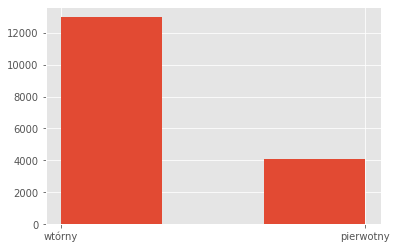

In [88]:
market.hist(bins =3)

## Elevator

In [89]:
elevator = data.Evelevator

In [91]:
elevator[:10]

0         tak
1         tak
2         tak
3         tak
4         nie
5         tak
6         tak
7         tak
8         tak
9    internet
Name: Evelevator, dtype: object

In [90]:
elevator.unique()

array(['tak', 'nie', 'internet', 'telewizja kablowa, internet, telefon',
       nan, 'plastikowe', 'telewizja kablowa, telefon', 'telefon',
       'meble', 'telewizja kablowa, internet', 'cegła',
       'monitoring / ochrona', 'system alarmowy, monitoring / ochrona',
       'drzwi / okna antywłamaniowe, domofon / wideofon',
       'domofon / wideofon', 'piwnica, oddzielna kuchnia',
       'telewizja kablowa', 'oddzielna kuchnia',
       'domofon / wideofon, monitoring / ochrona', 'piwnica',
       'zmywarka, lodówka, meble, kuchenka, telewizor',
       'piwnica, pom. użytkowe',
       'piwnica, oddzielna kuchnia, pom. użytkowe',
       'system alarmowy, teren zamknięty, domofon / wideofon, monitoring / ochrona, rolety antywłamaniowe',
       'drzwi / okna antywłamaniowe, teren zamknięty, domofon / wideofon, monitoring / ochrona',
       'drewniane',
       'system alarmowy, teren zamknięty, monitoring / ochrona',
       'teren zamknięty, domofon / wideofon, monitoring / ochrona',
     

In [92]:
round(elevator.isna().sum() / len(elevator),2)

0.36

In [93]:
elevator.describe()

count     14899
unique       99
top         tak
freq       5335
Name: Evelevator, dtype: object

## Balcony

In [94]:
balcony = data.Balcony

In [95]:
balcony[:10]

0     ogródek, taras
1             balkon
2             balkon
3             balkon
4    balkon, ogródek
5             balkon
6             balkon
7             balkon
8             balkon
9            ogródek
Name: Balcony, dtype: object

In [105]:
balcony.unique()

array(['ogródek, taras', 'balkon', 'balkon, ogródek', 'ogródek', nan,
       'taras', 'taras, balkon', 'taras, ogródek', 'balkon, taras',
       'balkon, ogródek, taras', 'taras, balkon, ogródek'], dtype=object)

In [101]:
balcony.describe()

count      16868
unique        10
top       balkon
freq       12887
Name: Balcony, dtype: object

In [102]:
round(balcony.isna().sum() / len(elevator),2)

0.28

<AxesSubplot:>

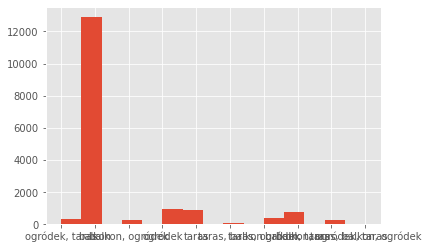

In [104]:
balcony.hist(bins =15)

## Year

In [106]:
year = data.Year

In [107]:
year[:10]

0    2019
1    2021
2    2011
3    2021
4    1939
5    1972
6    2023
7    2023
8    2021
9    2022
Name: Year, dtype: object

In [108]:
year.unique()

array(['2019', '2021', '2011', '1939', '1972', '2023', '2022',
       'apartamentowiec', nan, '2022-07-07', 'blok', '2008', 'kamienica',
       '2024', '1938', '1902', '1947', '1965', '2022-08-01', '1968',
       '2016', '1970', '1975', '1958', '2002', '1964', '2010', '1960',
       '2021-09-28', '1966', '1955', '1976', '1998', '2018', '1978',
       '2014', '2012', '1929', '1936', '2005', '1963', '1969', '1980',
       '2006', '2022-05-09', '1959', '1967', 'plastikowe', '2024-02-28',
       '2022-03-29', '2022-04-19', '1932', '1956', '2022-04-11', '2009',
       '1992', '1973', '1974', '1953', '1952', '1905', '2022-05-20',
       'nie', '1977', '2017', '2020', '2022-03-01', '1984', '2000',
       '2022-07-08', '2015', '2001', '2022-07-15', '2003', '1988', '1985',
       '1999', '1993', '1931', '1961', '1950', '2013', 'drewniane',
       '1935', '2022-07-11', '2022-07-01', '2022-08-10', '1989',
       '2022-09-01', '2007', '2022-08-29', '2022-08-15', '1937', '1990',
       '2022-10-01'

In [109]:
year.describe()

count     17047
unique      547
top        2022
freq       1405
Name: Year, dtype: object

In [110]:
round(year.isna().sum() / len(year),2)

0.27

## Level

In [112]:
level = data.Level

In [113]:
level[:10]

0    parter/6
1         4/4
2         2/6
3         NaN
4         1/3
5        3/10
6         2/7
7         7/8
8         NaN
9         2/2
Name: Level, dtype: object

In [114]:
level.describe()

count     22898
unique      263
top         1/4
freq        902
Name: Level, dtype: object

In [115]:
level.unique()

array(['parter/6', '4/4', '2/6', nan, '1/3', '3/10', '2/7', '7/8', '2/2',
       '5/26', '6/9', '3/3', '7/16', '5/5', 'parter/5', '1/5', 'parter/3',
       '4/8', '1/4', '2/3', '3/6', '5/10', '6/6', '6/8', '1/6', '1/7',
       '2/10', '6/10', '7/7', '2/9', '8/10', '1/8', '8/8', '5/6', '2/5',
       '1/2', '5/9', 'parter/4', '9/10', '2/8', '8/9', '8/12', 'parter/7',
       '5/7', '8/13', '2/4', '3/5', '3/7', '5/8', '3/8', '4/6', '3/4',
       '2', '2/11', '6/7', '4/5', '3', '4/10', '3/23', 'parter/10',
       'parter/2', '4/7', '10/10', 'parter/8', '6/12', '8/15', '1/10',
       '9/9', 'parter/1', '1/1', '7/10', '9/11', '7/15', '5/12', '6',
       '6/11', '&gt; 10/11', '&gt; 10/25', '3/12', '1', '&gt; 10/13',
       '&gt; 10/23', '&gt; 10/26', '6/26', '3/11', 'parter/9',
       '&gt; 10/22', '6/17', '4', '1/13', '4/23', '&gt; 10/24', '4/20',
       '3/2', '5/25', '3/9', '1/11', '1/9', '10/12', 'parter',
       '&gt; 10/12', '8/11', '5/14', '&gt; 10/20', '1/16', '&gt; 10/15',
       '10/

In [116]:
round(level.isna().sum() / len(level),2)

0.02

## Parking place

In [118]:
parking = data['Parking place']

In [119]:
parking[:10]

0    garaż/miejsce parkingowe
1                         NaN
2    garaż/miejsce parkingowe
3    garaż/miejsce parkingowe
4                         NaN
5    garaż/miejsce parkingowe
6    garaż/miejsce parkingowe
7    garaż/miejsce parkingowe
8    garaż/miejsce parkingowe
9    garaż/miejsce parkingowe
Name: Parking place, dtype: object

In [120]:
parking.describe()

count                        15157
unique                           1
top       garaż/miejsce parkingowe
freq                         15157
Name: Parking place, dtype: object

In [121]:
parking.unique()

array(['garaż/miejsce parkingowe', nan], dtype=object)

In [122]:
round(parking.isna().sum() / len(parking),2)

0.35